# Introducción a Numpy impulsado por oneAPI
## Objetivos de aprendizaje:
* Descripción de por qué merece la pena reemplazar código ineficiente, como bucles que consumen mucho tiempo
* Mostrar por qué reemplazar código ineficiente como los bucles de Python hace que el código sea más simple, más legible, más fácil de mantener y **más rápido** en el hardware existente
* Comprobar por qué el uso de Python para tareas pequeñas altamente repetitivas es ineficiente
* Enumerar las formas en que NumPy acelera el código
* Aplicar metodologías de reemplazo de bucle en una variedad de escenarios

# Numpy

* Librería [Numpy](https://numpy.org/) es biblioteca de Python que nos crea un objeto con un array multidimensional, objetos derivados y permite realizar serie de operaciones para arrays de forma optimizada.

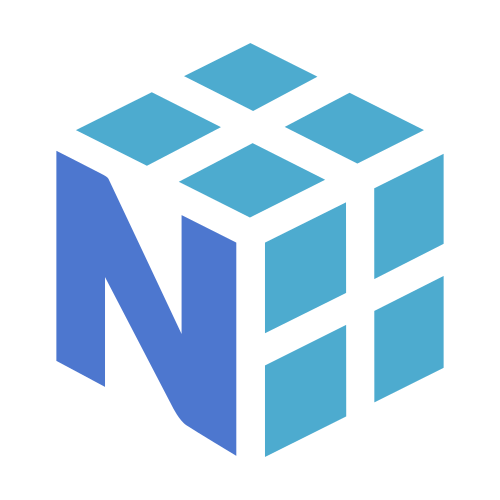

* Última versión disponible en el [Intel® AI Analytics Toolkit (AI Kit)](https://www.intel.com/content/www/us/en/developer/tools/oneapi/ai-analytics-toolkit.html#gs.khx64e) con librería optmizada para arquitecturas Intel





### Referencias
* [Video:  **Losing your Loops Fast Numerical Computing with NumPy** de Jake VanderPlas ](https://www.youtube.com/watch?v=EEUXKG97YRw)
* [Libro:  **Python Data Science Handbook** de Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/)
* [Libro:  **Elegant SciPy: The Art of Scientific Python** de Juan Nunez-Iglesias, Stéfan van der Walt, Harriet Dashnow](https://www.amazon.com/Elegant-SciPy-Art-Scientific-Python/dp/1491922877)
* [Paper:  **The Ultimate NumPy Tutorial for Data Science Beginners**](https://www.analyticsvidhya.com/blog/2020/04/the-ultimate-numpy-tutorial-for-data-science-beginners/)

## Vectorización

* Reemplazando los bucles explícitos asociados a las operaciones entre vectores/arrays: SIMD
* En general operaciones entre arrays pueden lograrse entre 1 o 2 órdenes de magnitud de velocidad que las equivalentes python puras

* La explotación de la vectorización **no es una teoría**
    * Grandes aceleraciones son posibles
    * Altamente recomendable utilizar librerías optimizadas en Intel oneAPI como **NumPy**, **SciPy** y otras
    * Explotar la bondad Numpy (paralelismo inherente) mediante el uso de las librerías optimizadas en oneAPI
* Ej: **100x de aceleración empleando Numpy** *broadcasting* respecto al código descrito como bucle

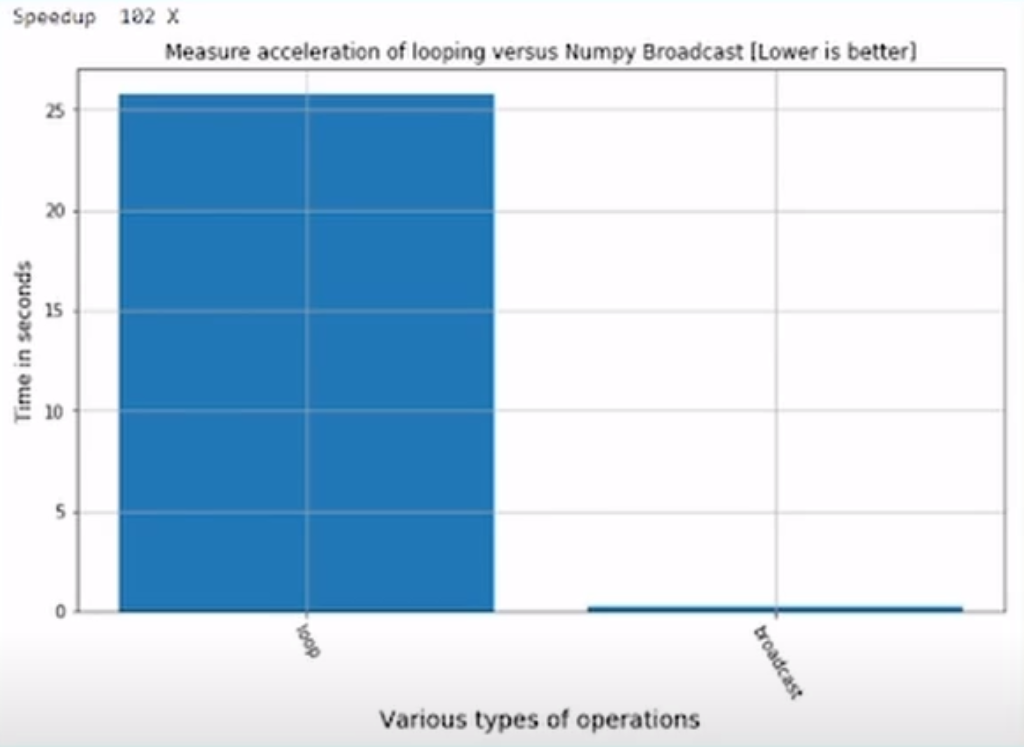

### Explicación
1. Las operaciones escalares (no vectorizadas) no son eficientes
    * Como llevar un autobús con un pasajero en una ciudad
    * ... es mucho más eficiente llenar el autobus con

```
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])
for i in range(len(a));
    c[i] = a[i] * b[i]
```



![vectorization_as_scalar.png](attachment:vectorization_as_scalar.png)

2. Accesos a memoria no contiguos
    * Ej: La lista [1, 2, 3, 4, 5, 6, 7, 8]
    * El acceso a estos datos en un bucle es muy costoso (cientos de ciclos)

![python_list_in_memory.png](attachment:python_list_in_memory.png)

    * Los accesos a memoria "random" matan el rendimiento
        * Las CPUs modernas tienen un jerarquía de memoria para explotar "localidad espacial de datos" 
        * Una línea de cache puede contener 16 elementos consecutivos
        * ... accesos aleatorios conlleva **no explotar localidad espacial**
    * Símil: Cocinero cocina un huevo frito
        1. Abre el cartón de huevos
        2. Saca el huevo
        3. Lo fríe
    * Más eficiente si hace 12 huevos al mismo tiempo y los fríe en una sartén grande
        * Pero acceder a datos "desordenados" supone abrir varios cartones de huevos para poder freirlos

### Uso de Numpy
* Numpy permite explotar la vectorización
    * Soporte de las funciones universales [(ufuncs)](https://numpy.org/doc/stable/reference/ufuncs.html)
    * Indexación de datos evidente
    * Facilita broadcasting
* Usar Numpy conlleva mejores patrones de acceso (explotación de jerarquía de memoria)
    * Operaciones eficientes equivalentes a programar en "C"
    * Reemplaza construcciones de bucles por construcciones con [**ufuncs**](https://numpy.org/doc/stable/reference/ufuncs.html) incluso con condicionales:
        * Operaciones matemáticas: add, multiply, ... true_divide, power, log...
        * Operaciones trigonométricas: sin, cos... arctanh, ... degree, rad2deg...
        * Operaciones a nivel de bit: bitwise_and, ...left_shift, 
        * Operaciones de comparación: greater, greater_equal, ... not_equal...

In [1]:
import numpy as np

# Create a list of elements
N = 100_000_000 # Number of records to process
L = list(100*(np.random.random(N))+1)

a1 = np.array(L)

a2 = np.empty([N, 2]) 

In [2]:
print(a2)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [3]:
# Create a matrix with ones
a3 = np.ones([N, 2])
print(a3)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [4]:
# Create Identity Matrix of given size
a4 = np.eye(100)
print(a4)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## Ejercicio
* Vamos a demostrar como haciendo uso de numpy mejoramos significativamente el rendimiento que podemos lograr programando en python bucles



In [5]:
import time 
a = []
t1=time.time()
timing = {}
for i in range(10_000_000):
    a.append(np.sin(i))
t2 = time.time()
print("With for loop and appending it took {} seconds".format(t2-t1))
timing['loop'] = (t2-t1)
a[:5]

With for loop and appending it took 11.152808427810669 seconds


[0.0,
 0.8414709848078965,
 0.9092974268256817,
 0.1411200080598672,
 -0.7568024953079282]

* Vamos a evitar el reemplazo simple de por fila ```np.append()``` calculando directamene el valor del seno
```a = np.sin(a)```

In [6]:
a = np.linspace(0, 10_000_000, num=10_000_000 + 1)
t1=time.time()
a = np.sin(a)
t2 = time.time()
print("With linspace and ufunc it took {} seconds for WAY MORE values!".format(t2-t1))
timing['numpy'] = (t2-t1)
a[:5]

With linspace and ufunc it took 0.0726311206817627 seconds for WAY MORE values!


array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

## Ejemplo: uso de funciones ufuncs
* Veamos otro ejemplo sencillo para ilustrar la ventaja de usar numpy frente a la programación ordinaria con python
* Como punto de partido vamos a elegir un ejemplo basado en la ejecución iterativa de un bucle, en este caso para calcular el log10 de un array


### ¿Como puedo "reformular" el código a Numpy?
* Numpy permite explotar la vectorización
    * Soporte de las funciones universales [(ufuncs)](https://numpy.org/doc/stable/reference/ufuncs.html)
    * Indexación de datos evidente
    * Facilita broadcasting

### Consejos
* Usar Numpy conlleva mejores patrones de acceso (explotación de jerarquía de memoria)
* Operaciones eficientes equivalentes a programar en "C"
* Reemplaza construcciones de bucles por construcciones con [**ufuncs**](https://numpy.org/doc/stable/reference/ufuncs.html) incluso con condicionales:
    * Operaciones matemáticas: add, multiply, ... true_divide, power, log...
    * Operaciones trigonométricas: sin, cos... arctanh, ... degree, rad2deg...
    * Operaciones a nivel de bit: bitwise_and, ...left_shift, 
    * Operaciones de comparación: greater, greater_equal, ... not_equal...
    * Operaciones de reducción

### Paquete intel-numpy
* Disponible como paquete de [python](https://pypi.org/project/intel-numpy/)

#### Características
* NumPy optimizado con Intel® oneMKL para una multitarea, vectorización y gestión de memoria eficiente
* Proporciona objeto matriz N-dimensional, herramientas de integración (C/C++ y Fortran), funciones de álgebra lineal, transformadas de Fourier y números aleatorios...
* Distribuciones de NumPy en PyPI tienen licencia BSD

In [7]:
# Create a blank list for appending elements
N = 100_000 # Number of records to process
L = list(100*(np.random.random(N))+1)

timing = {} # Just a blank dictionary to append to

t1=time.time()
l2 = []
for item in L:
    l2.append(np.log10(item))
t2 = time.time()
print("With for loop and appending it took {} seconds".format(t2-t1))
timing['loop'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

With for loop and appending it took 0.08436703681945801 seconds
First few elements of the resulting array: [1.8995985026126845, 1.5086117607788352, 1.906250754369507, 1.8625960143649125]




* Una alternativa de Python al bucle es emplear la función *map* que aplica una función a cada elemento de una lista

In [8]:
def op1(x):
    return (np.log10(x))

t1=time.time()

l2=list(map(op1,L))

t2 = time.time()
print("With list(map) functional method it took {} seconds".format(t2-t1))
timing['map'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

With list(map) functional method it took 0.08204531669616699 seconds
First few elements of the resulting array: [1.8995985026126845, 1.5086117607788352, 1.906250754369507, 1.8625960143649125]


* Otra alternativa en Python muy popular es usar una lista en lugar del bucle, pero como podemos observar los tiempos apenas mejoran

In [9]:
t1=time.time()
l2 = [np.log10(i+1) for i in range(len(L))]
t2 = time.time()
print("With list comprehension, it took {} seconds".format(t2-t1))
timing['list comprehension'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

With list comprehension, it took 0.11754512786865234 seconds
First few elements of the resulting array: [0.0, 0.3010299956639812, 0.47712125471966244, 0.6020599913279624]


**Ejercicio** reemplazar el código por ```a2=np.log10(a1)```

In [10]:
a1 = np.array(L)

t1=time.time()
# Notice that we assume we already converted the list to numpy 
# otherwise we should include that time as well
####### Insert corrected code below

a2=np.log10(a1)

##################################

t2 = time.time()
print("With direct NumPy log10 method it took {} seconds".format(t2-t1))
timing['numpy'] = (t2-t1)

print("First few elements of the resulting array:", a2[:4])

With direct NumPy log10 method it took 0.029720067977905273 seconds
First few elements of the resulting array: [1.8995985  1.50861176 1.90625075 1.86259601]


* Vamos a dibujar los resultados para mostrar las mejoras

Acceleration :    3 X


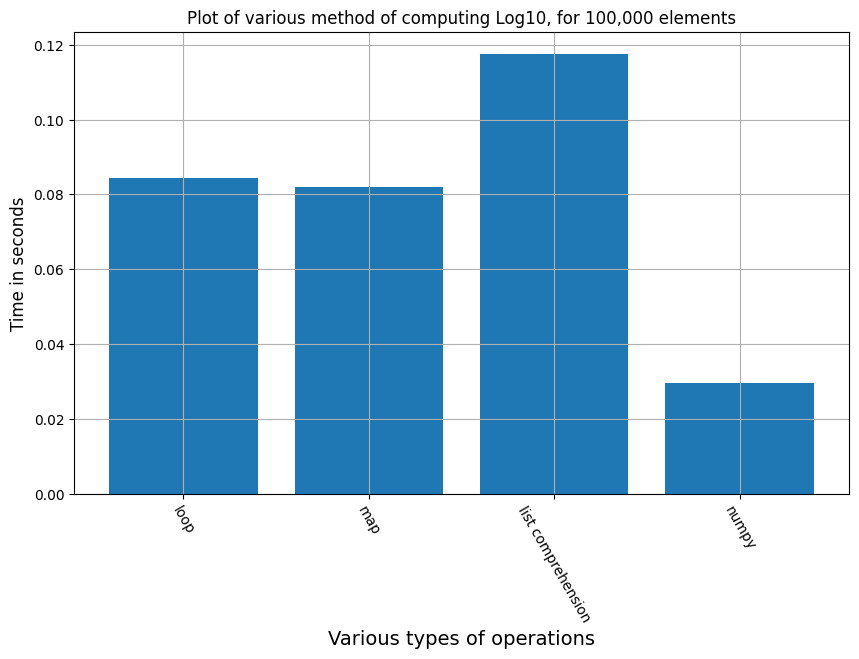

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Plot of various method of computing Log10, for {:,} elements".format(a1.shape[0]))
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.xticks(rotation=-60)
plt.grid(True)
plt.bar(x = range(len(timing)), height=list(timing.values()), align='center', tick_label=list(timing.keys()))
print('Acceleration : {:4.0f} X'.format(timing['loop']/timing['numpy']))

## Ejemplo: desplazamiento de vector cómunmente utilizado en IA para series temporales
* En IA, a menudo necesitamos desplazar datos
* Por ejemplo, en la predicción de series tiemporales, normalmente queremos predecir un valor posterior en una secuencia de tiempo, dados los datos de características anteriores disponibles. 
    * A menudo seleccionamos una variable de destino que se desplaza en el tiempo para predecir etiquetas posteriores en el tiempo.

* Supongamos que queremos un vector, visto como una columna de números, y cambiarlos por una constante. Agregue el último elemento de la lista para que sea cero.

* Enfoque ingenuo mediante un bucle for ```b[i] = a[i+1]```

In [12]:
# try naive loop
num = 100_000_001
a = np.linspace(0, num - 1, num=num)
b = np.ndarray(num-1)

timing = {}

t1=time.time()

for i in range(len(a)-1):
    b[i] = a[i+1]

t2=time.time()
print("shift b w loop {} secs".format(t2-t1))
timing['loop'] = (t2-t1)
b[:2], b[-2:]

shift b w loop 22.692399501800537 secs


(array([1., 2.]), array([9.9999999e+07, 1.0000000e+08]))

* La utilización de listas suele reportar un solución más eficiente


In [13]:
# try list comprehension 
t1=time.time()

b = [a[i+1] for i in range(len(a)-1)] # shift b by 1

t2=time.time()
print("shift b {} secs".format(t2-t1))
timing['list comprehension'] = (t2-t1)
b[:2], b[-2:]

shift b 13.413041591644287 secs


([1.0, 2.0], [99999999.0, 100000000.0])

* Utilizando las ufuncs de Numpy como **roll** y **delete**:

```b = np.eliminar( np.roll(a,-1) , -1)```

In [14]:
# try ufunc np.roll
t1=time.time()

b = np.delete( np.roll(a,-1) , -1)  # numpy roll and delete last value

t2=time.time()
print("shift b {} secs".format(t2-t1))
timing['RollDelete'] = (t2-t1)
b[:2], b[-2:]

shift b 14.939517259597778 secs


(array([1., 2.]), array([9.9999999e+07, 1.0000000e+08]))

* Usando atajos más sofisticados: reemplazando el código mediante
```b = a[1:]```

In [15]:
# try fancy slicing
t1=time.time()
####### Insert corrected code below

b = a[1:]

##################################

t2=time.time()
print("shift b {} secs".format(t2-t1))
timing['slicing'] = (t2-t1)
b[:2], b[-2:]

shift b 0.0001385211944580078 secs


(array([1., 2.]), array([9.9999999e+07, 1.0000000e+08]))

* Vamos a dibujar los tiempos de ejecución observados

Acceleration : 2e+05 X


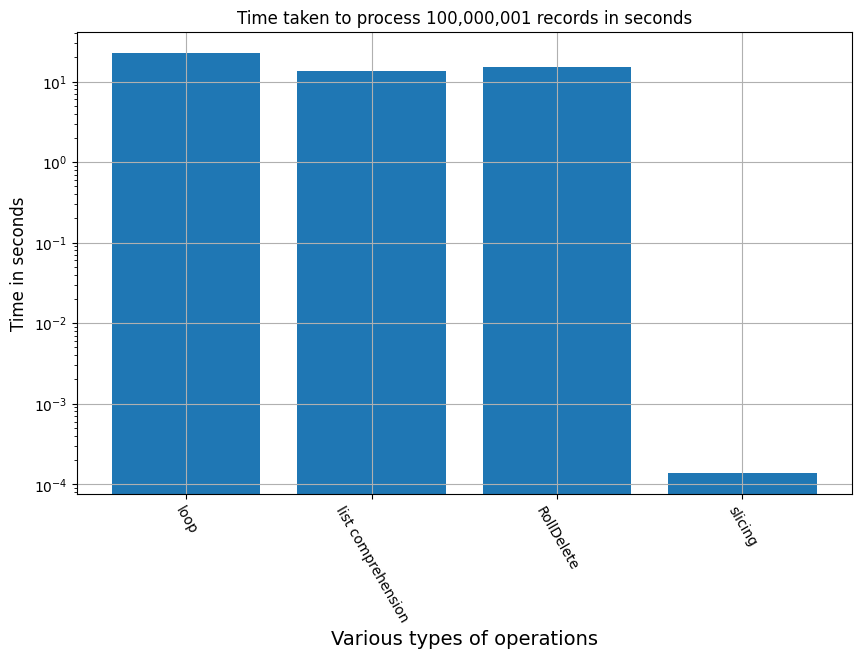

In [16]:
plt.figure(figsize=(10,6))
plt.title("Time taken to process {:,} records in seconds".format(num),fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.yscale('log')
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation=-60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))
print('Acceleration : {:4.0g} X'.format(timing['loop']/(timing['slicing'])))

## Ejemplo: Operaciones de agregación
* La agregación es un tipo de operación donde habitualmente operamos con una matriz y obtenemos datos resultantes con una dimensión más pequeña que la matriz original
* Las agregaciones normalmente se pueden hacer usando diferentes ejes para controlar la dirección
* ... En IA las operaciones más comunes son:
   * min
   * max
   * sum
   * mean
   * std ... y otras
   
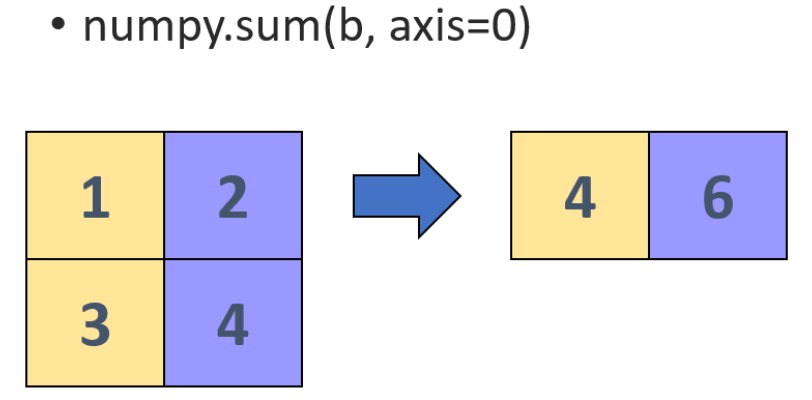


-------------------------------------------------- --------------------------------
| Funciones   | Descripción |
| ---         | --- |
| np.mean()   | Media aritmética a lo largo del eje especificado. |
| np.std()    | Desviación estándar a lo largo del eje especificado. |
| np.var()    | Varianza a lo largo del eje especificado. |
| np.sum()    | Suma de elementos de matriz sobre un eje dado. |
| np.prod()   | Producto de los elementos de la matriz sobre un eje dado. |
| np.cumsum() | Devuelve la suma acumulada de los elementos a lo largo de un eje dado. |
| np.cumprod() | Devuelve el producto acumulativo de elementos a lo largo de un eje dado. |
| np.min(), np.max() | Devuelve el mínimo/máximo de una matriz o el mínimo a lo largo de un eje. |
| np.argmin(), np.argmax() | Devuelve los índices de los valores mínimos/máximos a lo largo de un eje |
| np.all() | Prueba si todos los elementos de la matriz a lo largo de un eje dado se evalúan como verdaderos. |
| np.any() | Prueba si algún elemento de matriz a lo largo de un eje dado se evalúa como verdadero. |

* Existen cálculos especiales, que conviene tratar de simplificar con el fin de eliminar bucles
    * Ej; en IA a veces necesitamos sumar los valores de la diagonal
 
### Descripción de ejemplo 
* A continuación, se muestra un enfoque ingenuo para agregar todos los elementos de la diagonal de una matriz más bien pequeña de 1000 x 1000. Por lo tanto, la aceleración reescribiendo con NumPy es razonable
* La función ```numpy.diag``` devuelve la diagonal de la matriz, o ```numpy.trace``` devuelve la suma de los elementos de la diagonal

In [17]:
A = np.arange(1_000_000).reshape(1000, 1000)
Diag = 0

t1 = time.time()
for i in range(len(A)):
    for j in range(len(A)): 
        if i == j:
            Diag += A[i,j]
t2 = time.time()
Elapsed_Diag_base = t2-t1
print("elapsed time: ", Elapsed_Diag_base)
print("Diag: ", Diag)

elapsed time:  0.08885407447814941
Diag:  499999500


In [29]:
t1 = time.time()
##### insert single line numpy code below ####

#Diag = np.trace(A)
Diag = np.sum(np.diag(A))

##############################################
t2 = time.time()
Elapsed_Diag_numpy = t2 - t1
pprint("elapsed time: ", Elapsed_Diag_numpy)
print("Diag: ", Diag)
print("Acceleration: {:4.0f}X".format(Elapsed_Diag_base/Elapsed_Diag_numpy))

elapsed time:  0.0003840923309326172
Diag:  499999500
Acceleration:  231X


* Veamos otro ejemplo similar: calcular la media de y la desviación estándar de una matriz con y sin NumPy
   * ```numpy.mean()``` calcula la media
   * ```numpy.std()``` calcula la desviación estándar

In [37]:
import numpy as np

rng = np.random.default_rng(2021)
# random.default_range is the recommended method for generated random's
# see blog "Stop using numpy.random.seed()" for reasoning
# https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

a = rng.random((10_000_000,1))
t1 = time.time()
timing = {}
S = 0
for i in range (len(a)):
    S += a[i]
mean = S/len(a)
std = 0
for i in range (len(a)):
    d = a[i] - mean
    std += d*d
std = np.sqrt(std/len(a))
timing['loop'] = time.time() - t1
print("mean", mean)
print("std", std)

print(timing)

mean [0.49989965]
std [0.28868081]
{'loop': 34.60276675224304}


In [38]:
t1 = time.time()
print(a.mean())
print(a.std())

timing['numpy'] = time.time() - t1
print(timing)
print(f"Acceleration {timing['loop']/timing['numpy']:4.1f} X")

0.49989965005579673
0.288680809577358
{'loop': 34.60276675224304, 'numpy': 0.04784083366394043}
Acceleration 723.3 X


<BarContainer object of 2 artists>

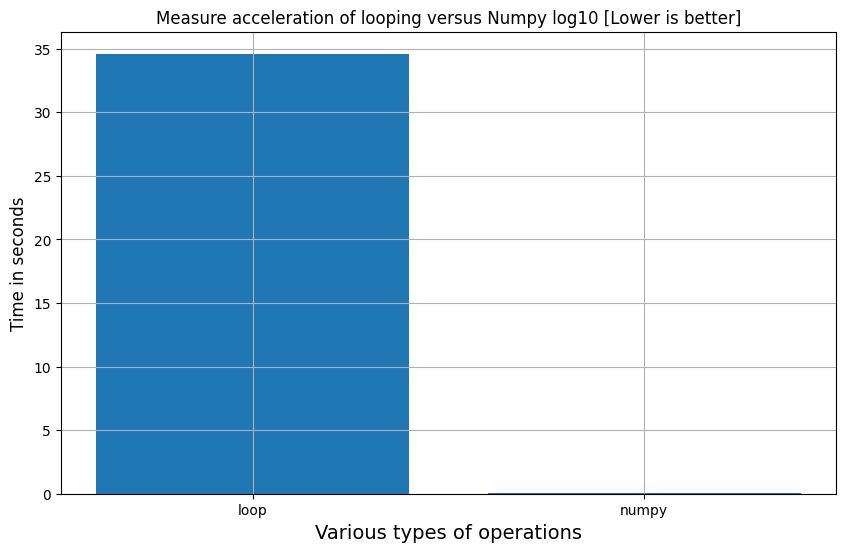

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy log10 [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

## Ejemplo: operaciones de broadcast
* Una descripción de las operaciones de broadcast fue impartida por Jake Van Der Plas en PyCon 2017: [Losing your Loops Fast Numerical Computing with NumPy](https://www.youtube.com/watch?v=EEUXKG97YRw)
* "El término **broadcast** describe cómo NumPy trata las matrices con diferentes dimensiones en las operaciones aritméticas

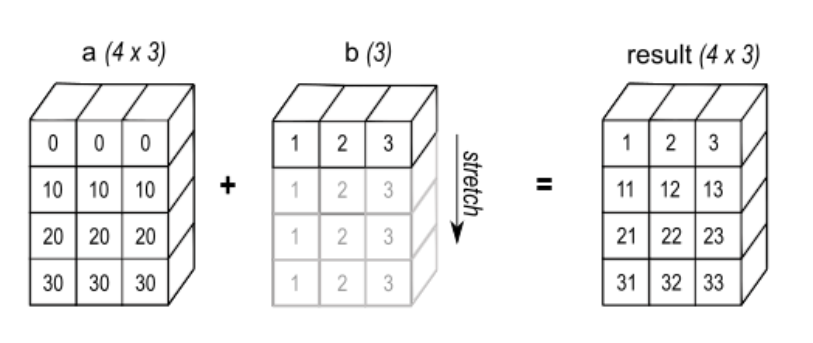

* Para ilustrar los beneficios vamos a normalizar un conjunto de datos o *dataset* de viviendas de California disponible en la librería scklearn
   * Este ejemplo combina Numpy **Agregations** con **Broadcasting**
   * El código reescitor como **Numpy** además de ser vectorizable es **MUCHO más legible** 

* Así es como funciona la transmisión aquí para el método de estandarización:
   * Si X es una matriz bidimensional (3,3)
   * ```X.mean(axis = 0)``` es un vector (1,3)
   * ```X.std(axis = 0)``` es un vector (1,3)
   * ambos vectores (1,3) se expanden/*broadcast* hasta la dimensión de X (3,3) porque las operaciones matriciales sobre matrices deben de tener las mismas dimensiones


In [40]:
from sklearn.datasets import fetch_california_housing
import numpy as np
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data.to_numpy()

def standardizeLoop(X): # about 15 lines of code, more to go wrong
    C = X.shape[-1]
    L = len(X)
    tmp = np.zeros(X.shape)

    for col in range(C):
        mean = 0
        total = 0
        for row in range(len(X)):
            total += X[row, col]
        mean = total/L
        diff2 = 0
        for row in range(L):
            d = X[row,col] - mean
            diff2 += d*d
            tmp[row, col] = X[row, col] - mean
        for row in range(L):
            tmp[row, col] = tmp[row, col]/np.sqrt(diff2/(L))
    return tmp

def standardize(A): # one line of code
#     A is two dimensional array
#     A.mean(axis = 0) is a vector (1,3)
#     A.std(axis = 0) is a vector (1,3)
#     both scalars are broadcast up to the dimension of A (3,3)
#     in Linear algebra Class you have to add/subtract arrays of same dimensions
    #return (A - A.mean(axis=0))/A.std(axis=0)
    return (A - np.mean(A, axis=0))/np.std(A, axis=0)

print("standardize Loop")
print(standardizeLoop(X))

print("standardize NumPy")
print(standardize(X))


/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


standardize Loop
[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]
standardize NumPy
[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.750146

In [41]:
import time
timing = {}
t1 = time.time()
standardizeLoop(X)
timing['loop'] = time.time() -t1

t1 = time.time()
standardize(X)
timing['numpy'] = time.time() -t1
print(timing)
print(f"Acceleration {timing['loop']/timing['numpy']:4.1f} X")

{'loop': 0.32296299934387207, 'numpy': 0.0015268325805664062}
Acceleration 211.5 X


## Ejemplo: operaciones condicionales con Numpy
* Una construcción en programación que podría evitar que obtengamos un rendimiento vectorial efectivo al tener la necesidad de escribir el código con bucles aparece cuando hay operaciones del tipo **if then**/**else** en él
* La operación ***where** de numpy nos permite abordar bucles condicionales de forma rápida y vectorizada

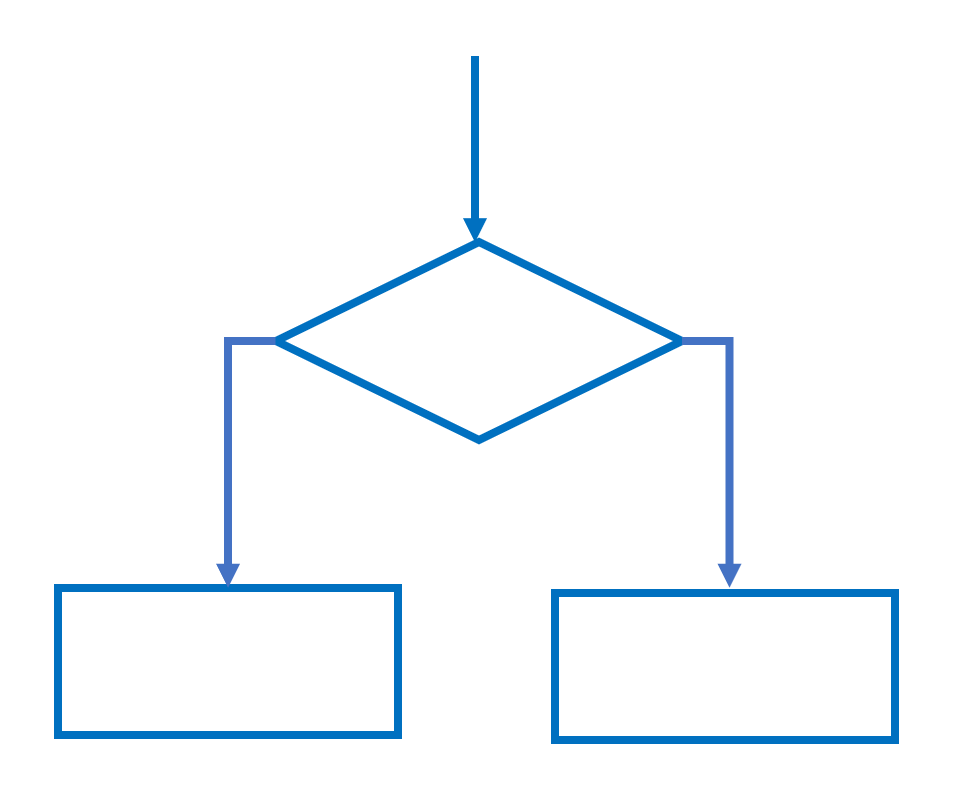

* Sintaxis:

```numpy.where(condición, [x, y, ]/)```

* Devuelve los elementos elegidos de x o y dependiendo de la condición.
* Veamos un ejemplo simple a continuación para agregar 50 a todos los elementos actualmente mayores que 5:

In [49]:
a = np.arange(10)
np.where(a > 5, a + 50, a )
# if a > 5 then return a + 50
# else return a

array([ 0,  1,  2,  3,  4,  5, 56, 57, 58, 59])